<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Đồ án thực hành Cuối kỳ - Nhập môn Khoa học Dữ liệu  
</div>

### Giảng viên hướng dẫn:
- Thầy Lê Nhựt Nam
- Cô Nguyễn Thị Thu Hằng
- Thầy Trần Quốc Huy
### Thông tin nhóm: Nhóm 23
| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Phan Cao Nguyên       | 21120299  |
| Nguyễn Phương    Thảo | 21120336  |

### Chủ đề: Heart Attack Analysis & Prediction


<div style="text-align: left; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 5px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Pha 01 – Thu thập và khám phá dữ liệu 📌
</div>

# I. Thu thập dữ liệu

## 1. Giới thiệu:

### 1.1. Thông tin về dữ liệu
- **Rates and Trends in Hypertension-related Cardiovascular Disease Mortality Among US Adults (35+) by County, Age Group, Race/Ethnicity, and Sex – 2000-2019**: Bộ dữ liệu này ghi lại tỷ lệ và xu hướng về tỷ lệ tử vong do bệnh tim mạch (CVD) liên quan đến tăng huyết áp cục bộ của dân số Hoa Kỳ.

Bộ dữ liệu này ghi nhận số liệu theo cấp quận (hoặc tương đương quận) về tỷ lệ tử vong do bệnh tim mạch liên quan đến tăng huyết áp cục bộ:
- Trong giai đoạn 2000-2019 và xu hướng trong hai khoảng thời gian (2000-2010, 2010-2019) 
- Theo nhóm tuổi (độ tuổi 35–64, độ tuổi 65 trở lên), 
- Theo chủng tộc/sắc tộc (người Mỹ gốc Ấn Độ/người bản địa Alaska không phải gốc Tây Ban Nha, người châu Á/đảo Thái Bình Dương không phải gốc Tây Ban Nha, người da đen không phải gốc Tây Ban Nha, người gốc Tây Ban Nha, người da trắng không phải gốc Tây Ban Nha)
- Theo giới tính (nữ, nam).
- **Heart Disease Mortality Data Among US Adults (35+) by State/Territory and County – 2018-2020**: Bộ dữ liệu này ghi lại tỷ lệ và xu hướng về tỷ lệ tử vong do bệnh tim mạch (CVD) liên quan đến tăng huyết áp cục bộ của dân số Hoa Kỳ, bình quân 3 năm 2018-2020.

### 1.2. Thông tin về các thuộc tính
#### NOTE:
Mô tả sơ về các cột trong dữ liệu mà nhóm đã lấy về được: 
1. **locationid** : ID của quận (county)
2. **year** : Năm hoặc giai đoạn của dữ liệu
3. **locationabbr** : Địa điểm (Viết tắt của bang)
4. **locationdesc** : Mô tả về địa điểm (Tên Quận)
5. **data_value_unit** : Đơn vị đo lường
6. **data_value_type** : Loại giá trị 
7. **age_group** : Phân loại theo nhóm tuổi
8. **race/ethnicityage_group** : Phân loại theo chủng tộc
9. **sex** : Phân loại theo giới tính
10. **x_long** : Kinh độ 
11. **y_lat** : Vĩ độ
12. **data_value** : Giá trị dữ liệu 
13. **confidence_limit_low** : Độ tin cậy thấp nhất
14. **confidence_limit_high_high**: Độ tin cậy cao nhất

* Data_value có khoảng tin cậy 95%


### 1.3. Lý do chọn?


- Về các vấn đề sức khoẻ nói chung và bệnh tim mạch nói riêng: Tỷ lệ tử vong vì bệnh trong một năm là thước đo tình hình sức khoẻ trong cộng đồng vào năm đó. Thể hiện xu hướng và mức độ nghiêm trọng của bệnh lý này.

- Tăng huyết áp là yếu tố nguy cơ hàng đầu gây ra bệnh tim mạch (CVD) và tử vong sớm. Tỉ lệ tử vong liên quan đế tăng huyết áp đã tăng lên kể từ năm 2000, và đang dần tăng thêm sau nhiều thập kỷ suy giảm. 

- Bộ dữ liệu ghi lại xu hướng về tỷ lệ ở cấp độ quận, giúp xem xét và tiến hành các biện pháp thích hợp ở địa phương (ưu tiên phòng ngừa, phát hiện và kiểm soát). Đặc biệt là ở người trưởng thành trong độ tuổi lao động và ở những nơi có cường độ công việc/ gánh nặng công việc lớn.


## 2. Thêm các thư viện cần thiết và tiến hành lấy dữ liệu bằng API

In [1]:
# import libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Đường dẫn đến dữ liệu

In [2]:
# set the url for the data
url1 = "https://data.cdc.gov/resource/uc9k-vc2j.json" # data from 2000-2019
url2 = "https://chronicdata.cdc.gov/resource/jiwm-ppbh.json" # data from 2018-2020

##### Thiết lập các tham số trước khi lấy dữ liệu
Ở đây nhóm chọn lấy 1.000.000 records.

In [3]:
# set the parameters for the data
limit = 1000000
offset = 0 
params = {"$limit": limit, "$offset": offset}

##### Lấy dữ liệu từ webAPI 

In [4]:
# get the data
response1 = requests.get(url1, params=params)
data1 = response1.json()
#data1

In [5]:
# get the data
response2 = requests.get(url2, params=params)
data2 = response2.json()
#data2

##### Chuyển dữ liệu về dạng dataframe 

In [6]:
# convert the data to a dataframe
df1 = pd.DataFrame(data1)
df1.sample(5)

,locationid,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value_unit,data_value_type,...,stratificationcategory2,stratification2,stratificationcategory3,stratification3,topicid,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
577156,30095,2003,MT,Stillwater,County,NVSS,Cardiovascular Diseases,Major Cardiovascular Disease,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Race/EthnicityAge group,Asian and Pacific Islander,Sex,Overall,T1,-109.39493292,45.66917431,NaN,NaN,NaN
404392,22083,2011,LA,Richland,County,NVSS,Cardiovascular Diseases,Major Cardiovascular Disease,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Race/EthnicityAge group,Hispanic,Sex,Overall,T1,-91.76342887,32.41734252,NaN,NaN,NaN
603672,31133,2014,NE,Pawnee,County,NVSS,Cardiovascular Diseases,Major Cardiovascular Disease,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Race/EthnicityAge group,Overall,Sex,Overall,T1,-96.2370633,40.13139313,431.2,301.7,619.7
398057,22047,2013,LA,Iberville,County,NVSS,Cardiovascular Diseases,Major Cardiovascular Disease,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Race/EthnicityAge group,Overall,Sex,Female,T1,-91.34815102,30.25792577,361.2,265.5,431.4
757554,40055,2017,OK,Greer,County,NVSS,Cardiovascular Diseases,Major Cardiovascular Disease,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-99.56022324,34.93577921,NaN,NaN,NaN


In [7]:
df1.to_csv('Data/raw_data.csv') # lưu lại data gốc trước khi xử lý

In [8]:
# convert the data to a dataframe
df2 = pd.DataFrame(data2)
df2.head()

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
0,2019,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,182.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,02013,55.442393334,-161.9599296,NaN,NaN
1,2019,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,02016,53.648343064,-166.9175329,NaN,NaN
2,2019,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,02020,61.159144533,-149.1045591,NaN,NaN
3,2019,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,343.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,02050,60.923647647,-159.7532618,NaN,NaN
4,2019,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,02060,58.753495988,-156.694662,~,Insufficient Data


# II. Tiền xử lý và khám phá dữ liệu

## 1. About df1:

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   locationid                  1000000 non-null  object
 1   year                        1000000 non-null  object
 2   locationabbr                1000000 non-null  object
 3   locationdesc                1000000 non-null  object
 4   geographiclevel             1000000 non-null  object
 5   datasource                  1000000 non-null  object
 6   class                       1000000 non-null  object
 7   topic                       1000000 non-null  object
 8   data_value_unit             1000000 non-null  object
 9   data_value_type             1000000 non-null  object
 10  data_value_footnote_symbol  480018 non-null   object
 11  data_value_footnote         480018 non-null   object
 12  stratificationcategory1     1000000 non-null  object
 13  stratificatio

### Dữ liệu có bao nhiêu dòng, cột?

In [10]:
shape = df1.shape
print(f"Current shape:{shape}")

Current shape:(1000000, 24)


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong DataFrame total_percent_df cho biết tỷ lệ hoặc xu hướng về tỷ lệ tử vong do bệnh tim mạch (CVD) liên quan đến tăng huyết áp cục bộ của dân số Hoa Kỳ.

### Dữ liệu có các dòng bị trùng lặp hay không?
Ta sẽ kiểm tra thử xem có dòng nào bị trùng không? Nếu có thì lưu số dòng trùng vào biến `have_dupicated_rows`

In [11]:
have_duplicated_rows = df1.duplicated().sum()

In [12]:
# TEST
assert have_duplicated_rows == False

Kết quả sau kiểm tra cho thấy không có dòng nào bị trùng lắp.

### Mỗi cột có ý nghĩa gì?

In [13]:
columns_name = df1.columns
print("Các cột hiện có:\n",columns_name)

Các cột hiện có:
 Index(['locationid', 'year', 'locationabbr', 'locationdesc', 'geographiclevel',
       'datasource', 'class', 'topic', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'stratificationcategory3', 'stratification3',
       'topicid', 'x_long', 'y_lat', 'data_value', 'confidence_limit_low',
       'confidence_limit_high'],
      dtype='object')


Mô tả sơ về các cột trong dữ liệu mà nhóm đã lấy về được: 
1. **locationid** : ID của Quận 
2. **year** : Năm hoặc giai đoạn của dữ liệu
3. **locationabbr** : Viết tắt của bang (State)
4. **locationdesc** : Tên Quận 
5. **geographilevel** : Cấp độ địa lý
6. **datasource** : Nguồn dữ liệu
7. **class** : Nhóm dữ liệu
8. **topic** : Chủ đề của dữ liệu
9. **data_value_unit** : Đơn vị đo lường
10. **data_value_type** : Loại giá trị 
11. **data_value_footnote_symbol** : Biểu tượng chú thích
12. **data_value_footnote** : Giá trị chú thích
13. **stratificationcategory1** : Kiểu phân loại 1
14. **stratification1** : Giá trị của kiểu phân loại 1
15. **stratificationcategory2** : Kiểu phân loại 2
16. **stratification2** : Giá trị của kiểu phân loại 2
17. **stratificationcategory3** : Kiểu phân loại 3
18. **stratification3** : Giá trị của kiểu phân loại 3
19. **topicid** : ID của chủ đề
20. **x_long** : Kinh độ 
21. **y_lat** : Vĩ độ
22. **data_value** : Giá trị dữ liệu 
23. **confidence_limit_low** : Độ tin cậy thấp nhất
24. **confidence_limit_high_high**: Độ tin cậy cao nhất

### Từng cột đang có kiểu dữ liệu như thế nào? Có phù hợp để xử lý cho các bước kế tiếp không?

In [14]:
df1.dtypes

locationid                    object
year                          object
locationabbr                  object
locationdesc                  object
geographiclevel               object
datasource                    object
class                         object
topic                         object
data_value_unit               object
data_value_type               object
data_value_footnote_symbol    object
data_value_footnote           object
stratificationcategory1       object
stratification1               object
stratificationcategory2       object
stratification2               object
stratificationcategory3       object
stratification3               object
topicid                       object
x_long                        object
y_lat                         object
data_value                    object
confidence_limit_low          object
confidence_limit_high         object
dtype: object

Các cột đều đang ở dạng object, điều này là không nên bởi vì nếu cột nào cũng ở dạng object thì rất khó tính toán. Do đó, nhóm sẽ tiến hành chuyển đổi các cột về kiểu dữ liệu phù hợp 

Các cột có thể chuyển đổi sang numeric: x_long,	y_lat, data_value,	confidence_limit_low,	confidence_limit_high  

**Đầu tiên, xem xét dữ liệu trong 4 cột x_long,	y_lat, data_value,	confidence_limit_low,	confidence_limit_high**

In [15]:
numeric_cols =["x_long","y_lat", "data_value",	"confidence_limit_low",	"confidence_limit_high"]
df1[numeric_cols]

,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
0,-86.64295911,32.53530561,NaN,NaN,NaN
1,-86.64295911,32.53530561,NaN,NaN,NaN
2,-86.64295911,32.53530561,NaN,NaN,NaN
3,-86.64295911,32.53530561,NaN,NaN,NaN
4,-86.64295911,32.53530561,NaN,NaN,NaN
...,...,...,...,...,...
999995,-77.63220543,37.0760146,NaN,NaN,NaN
999996,-77.63220543,37.0760146,NaN,NaN,NaN
999997,-77.63220543,37.0760146,NaN,NaN,NaN
999998,-77.63220543,37.0760146,433.1,342.3,525.8


Nhận thấy dữ liệu là các số thực, tiến hành chuyển sang dạng số:

In [16]:
df1[numeric_cols]=df1[numeric_cols].astype(np.float64)
df1.dtypes

locationid                     object
year                           object
locationabbr                   object
locationdesc                   object
geographiclevel                object
datasource                     object
class                          object
topic                          object
data_value_unit                object
data_value_type                object
data_value_footnote_symbol     object
data_value_footnote            object
stratificationcategory1        object
stratification1                object
stratificationcategory2        object
stratification2                object
stratificationcategory3        object
stratification3                object
topicid                        object
x_long                        float64
y_lat                         float64
data_value                    float64
confidence_limit_low          float64
confidence_limit_high         float64
dtype: object

### Kiểm tra sơ lược về giá trị của từng cột

In [17]:
# Đếm số dữ liệu duy nhất của từng cột
unique_counts = df1.nunique().sort_values()
# Hiển thị kết quả
print("Số dữ liệu duy nhất của từng cột:")
print(unique_counts)


### Xoá các cột không có ý nghĩa

In [ ]:
# Tách lấy các cột chỉ mang 1 giá trị 
one_value_cols = [col for col in df1.columns if unique_counts[col] == 1]
print("Các cột chỉ có 1 giá trị, và giá trị tương ứng của cột đó:")
for col in one_value_cols:
    #print(col,":\t",df[col][0])
    print("{:<28} : {:>2}".format(col, df1[col][0]))

Các cột chỉ có 1 giá trị, và giá trị tương ứng của cột đó:
geographiclevel              : County
datasource                   : NVSS
class                        : Cardiovascular Diseases
topic                        : Major Cardiovascular Disease
data_value_footnote_symbol   :  ~
data_value_footnote          : Value suppressed
stratificationcategory1      : Age group
stratificationcategory2      : Race/EthnicityAge group
stratificationcategory3      : Sex
topicid                      : T1


Ta thấy, các cột vừa liệt kê chỉ mang duy nhất 1 giá trị cho toàn bộ 1000000 dòng dữ liệu. 
Điều đó nói lên điểm chung của bộ dữ liệu này là: 
- Được thống kê ở cấp độ địa lý là Quận/Hạt (County)
- Nguồn dữ liệu từ NVSS (National Vital Statistics System)
- Lớp Bệnh tim mạch (Cardiovascular Diseases)
- Chủ đề: Bệnh tim mạch nặng
- Biểu tượng chú thích giá trị dữ liệu: "~" (Xấp xỉ)
- Chú thích giá trị dữ liệu : Giá trị bị chặn/ ẩn (Xử lý nhiễu)
- Danh mục phân loại 1: Nhóm tuổi (Age group)
- Danh mục phân loại 2: Chủng tộc/ Dân tộc + Nhóm tuổi
- Danh mục phân loại 3: Giới tính
- Mã chủ đề: Cùng là `T1` 
 
Tuy nhiên, chúng không đóng góp/ ảnh hưởng gì vào quá trình tính toán về sau, nhóm em xem xét loại bỏ chúng.  
Ngoài ra, trước khi loại bỏ, nhóm chúng em xem xét thấy các cột `stratificationcategory*` là tên loại của các cột `stratification*`, cho nên chúng em sẽ tiến hành đổi tên.


In [ ]:
# Đổi tên 
column_names = {'stratification1': 'age_group', 'stratification2': 'race/ethnicityage_group', 'stratification3': 'sex'}
df1 = df1.rename(columns=column_names)
df1.columns

Index(['locationid', 'year', 'locationabbr', 'locationdesc', 'geographiclevel',
       'datasource', 'class', 'topic', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'stratificationcategory1', 'age_group', 'stratificationcategory2',
       'race/ethnicityage_group', 'stratificationcategory3', 'sex', 'topicid',
       'x_long', 'y_lat', 'data_value', 'confidence_limit_low',
       'confidence_limit_high'],
      dtype='object')

Tiến hành loại bỏ các cột không cần dùng (đã giải thích ở trên)

In [ ]:
# Xoá các cột không cần dùng
df1 = df1.drop(columns=['geographiclevel', 'datasource', 'class', 'topic', 'data_value_footnote_symbol', 'data_value_footnote', 'stratificationcategory1', 'stratificationcategory2', 'stratificationcategory3', 'topicid'])
print(df1.shape)
df1.columns

(1000000, 14)


Index(['locationid', 'year', 'locationabbr', 'locationdesc', 'data_value_unit',
       'data_value_type', 'age_group', 'race/ethnicityage_group', 'sex',
       'x_long', 'y_lat', 'data_value', 'confidence_limit_low',
       'confidence_limit_high'],
      dtype='object')

### Khám phá dữ liệu

### 1. Convert data

**Về df1:** data_type_value có 2 giá trị: Total percent change & Age-Standardized, Spatiotemporally Smoothed Rate, trong đó:
- Total percent change: Giá trị này thường được sử dụng để biểu thị sự thay đổi tương đối giữa hai thời điểm hoặc giữa hai nhóm dữ liệu. 
- Age-Standardized, Spatiotemporally Smoothed Rate: chuẩn hóa, làm mịn dữ liệu theo sự biến động của yếu tố tuổi tác.  


Đồng thời do 2 cái xài 2 value_unit khác nhau, cái đầu % cái sau per 100,00 (tính trên 100000 dân) nên tách làm 2 df khác nhau để dùng riêng.  

*Chức năng:*
- **Total percent change** sử dụng khi tính sự thay đổi tuyệt đối trong các giá trị cụ thể (khoảng thời gian - giai đoạn)

- **Age-Standardized, Spatiotemporally Smoothed Rate** sử dụng khi so sánh tỷ lệ của giữa các nhóm dân số hoặc khi làm mịn dữ liệu để loại bỏ nhiễu để dễ quan sát hơn. (Mốc thời gian - năm)

In [ ]:
total_percent_df = df1[df1['data_value_type'] == 'Total percent change'] 
total_percent_df = total_percent_df.drop(columns=['data_value_type', 'data_value_unit'])
total_percent_df.reset_index(drop=True, inplace=True)
print('Số dòng, cột của total_percent_df:',total_percent_df.shape)
total_percent_df.sample(5)


Số dòng, cột của total_percent_df: (90958, 12)


,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
48475,29073,2000-2010,MO,Gasconade,Ages 35-64 years,Hispanic,Overall,-91.507819,38.440667,NaN,NaN,NaN
44717,28005,2010-2019,MS,Amite,Ages 35-64 years,Overall,Female,-90.804449,31.174270,45.4,8.2,92.4
47426,29005,2000-2010,MO,Atchison,Ages 65+ years,Overall,Overall,-95.428327,40.430839,5.8,-33.8,48.5
13982,13113,2010-2019,GA,Fayette,Ages 35-64 years,Black,Overall,-84.494677,33.413550,36.8,1.1,103.4
40517,26081,2010-2019,MI,Kent,Ages 65+ years,American Indian and Alaska Native,Overall,-85.549346,43.032091,NaN,NaN,NaN


In [ ]:
smoothed_rate_df = df1[df1['data_value_type'] == 'Age-Standardized, Spatiotemporally Smoothed Rate']
smoothed_rate_df = smoothed_rate_df.drop(columns=['data_value_type', 'data_value_unit'])
smoothed_rate_df.reset_index(drop=True, inplace=True)
print('Số dòng, cột của smoothed_rate_df:',smoothed_rate_df.shape)
smoothed_rate_df.sample(5)

Số dòng, cột của smoothed_rate_df: (909042, 12)


,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
852440,48293,2000,TX,Limestone,Ages 65+ years,Overall,Overall,-96.580954,31.545477,533.1,445.5,634.0
331794,21099,2014,KY,Hart,Ages 65+ years,Overall,Male,-85.884468,37.299712,472.3,381.0,599.0
551045,31149,2005,NE,Rock,Ages 35-64 years,American Indian and Alaska Native,Overall,-99.449824,42.421424,NaN,NaN,NaN
277172,19167,2012,IA,Sioux,Ages 35-64 years,Black,Overall,-96.178025,43.082791,NaN,NaN,NaN
619680,37105,2000,NC,Lee,Ages 65+ years,American Indian and Alaska Native,Overall,-79.171654,35.474898,NaN,NaN,NaN


### 2. Đối với total_percent_df

In [ ]:
# Biến numerical
num_vars = ['data_value','confidence_limit_low','confidence_limit_high']

#### Với mỗi cột dạng số (numeric columns), dữ liệu đang phân bố như thế nào?

Ứng với mỗi cột dạng số, ta xem xét tính các giá trị sau: 
- Tỷ lệ (0-100%) của các giá trị bị thiếu
- Giá trị nhỏ nhất 
- Phân vị 25
- Phân vị 50
- Phân vị 75
- Giá trị lớn nhất
  
Note: 2 cột x_long, y_lat biểu thị cho kinh độ và vĩ độ, nhóm chỉ xem xét tỷ lệ mất dữ liệu, không xem xét các giá trị còn lại.


In [ ]:
def missing_ratio(column):
    missing_percentage = column.isna().sum()/len(column)
    return missing_percentage*100

num_col_info_total_df = total_percent_df.select_dtypes(include=['float64'])
num_col_info_total_df = num_col_info_total_df.agg([missing_ratio])

num_col_info_total_df = pd.concat([num_col_info_total_df,total_percent_df.describe()])
num_col_info_total_df

,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
missing_ratio,0.000000,0.000000,47.997977,47.997977,47.997977
count,90958.000000,90958.000000,47300.000000,47300.000000,47300.000000
mean,-92.097664,37.857173,27.198290,-6.499317,74.441562
std,11.205696,4.967314,47.259159,34.053117,70.677068
min,-124.156295,20.988133,-94.800000,-95.700000,-93.700000
25%,-98.351618,34.088838,-5.300000,-29.400000,24.900000
50%,-90.969001,38.022839,17.800000,-12.700000,59.900000
75%,-84.052908,41.397906,49.400000,9.200000,107.900000
max,-67.629152,48.814842,734.300000,621.500000,867.300000


Kết quả cho thấy các cột ***'data_value', 'confidence_limit_low', 'confidence_limit_high'*** có tỉ lệ thiếu dữ liệu là ~48% (gần 1 nửa tổng thể). Thay vì điền dữ liệu vào các dòng thiếu, nhóm chọn cách loại bỏ các dòng đó để tránh làm sai lệch giá trị dự đoán khi điền giá trị khác vào.

Ngoài ra, các cột `confidence_limit_low`, `confidence_limit_high` thể hiện cho khoảng tin cậy của data_value, nên nhóm em tập trung xử lý cho data_value là chính.

In [ ]:
total_percent_df = total_percent_df.dropna(subset=['data_value'])
print(total_percent_df.shape)

(47300, 12)


Kiểm tra lại:

In [ ]:
num_col_info_total_df = total_percent_df.select_dtypes(include=['float64'])
num_col_info_total_df = num_col_info_total_df.agg([missing_ratio])

num_col_info_total_df = pd.concat([num_col_info_total_df,total_percent_df.describe()])
num_col_info_total_df

,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000
count,47300.000000,47300.000000,47300.000000,47300.000000,47300.000000
mean,-91.032686,37.442440,27.198290,-6.499317,74.441562
std,11.407319,4.767063,47.259159,34.053117,70.677068
min,-124.156295,23.751495,-94.800000,-95.700000,-93.700000
25%,-96.794694,33.772088,-5.300000,-29.400000,24.900000
50%,-89.479020,37.545579,17.800000,-12.700000,59.900000
75%,-83.250071,40.990033,49.400000,9.200000,107.900000
max,-67.629152,48.814842,734.300000,621.500000,867.300000


### Outlier
Vẽ biểu đồ boxplot để tìm outliers của các cột numeric 

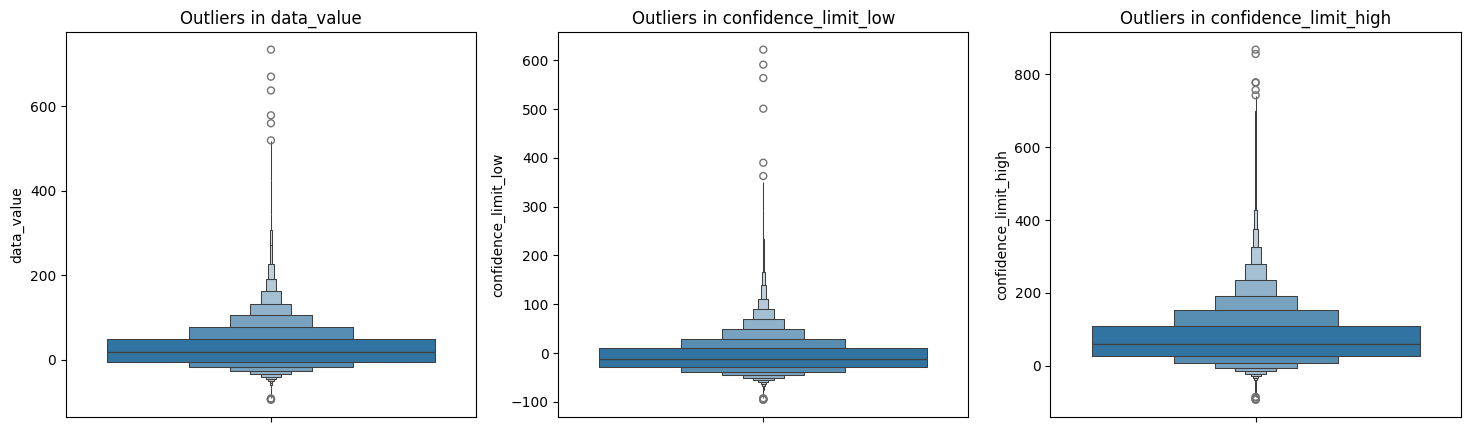

In [ ]:
count = 1
plt.figure(figsize = (18, 5))

for col in ['data_value', 'confidence_limit_low',
       'confidence_limit_high']:
   plt.subplot(1,3,count)
   sns.boxenplot(y=col,data=total_percent_df)
   plt.title('Outliers in {}'.format(col))
   count+=1
plt.show() 

Ta thấy outlier nằm ở các dòng có data_value > 500, ta thử in các dòng này xem:

In [ ]:
outliers_value = total_percent_df[total_percent_df['data_value'] > 500]
outliers_value.reset_index(inplace=True)
outliers_value.sort_values(by = 'data_value', ascending=False)

,index,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
5,5707,05143,2010-2019,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,734.3,621.5,855.4
7,5712,05143,2010-2019,AR,Washington,Ages 65+ years,White,Overall,-94.215697,35.979061,670.3,590.8,777.7
6,5709,05143,2010-2019,AR,Washington,Ages 65+ years,Overall,Overall,-94.215697,35.979061,637.6,563.3,738.5
4,5706,05143,2010-2019,AR,Washington,Ages 65+ years,Overall,Female,-94.215697,35.979061,578.8,500.5,703.3
1,4814,05087,2010-2019,AR,Madison,Ages 65+ years,Overall,Male,-93.724644,36.010991,559.9,345.5,867.3
2,4817,05087,2010-2019,AR,Madison,Ages 65+ years,White,Overall,-93.724644,36.010991,519.4,318.3,776.2
3,5689,05143,2010-2019,AR,Washington,Ages 35-64 years,Overall,Female,-94.215697,35.979061,516.6,389.8,713.7
0,4797,05087,2010-2019,AR,Madison,Ages 65+ years,Overall,Overall,-93.724644,36.010991,507.0,312.3,756.7


Trích xuất dữ liệu trong khoảng thời gian tương ứng từ smoothed_rate_df để kiểm tra tính đúng đắn của các dòng trên (đảm bảo không phải lỗi nhập liệu).


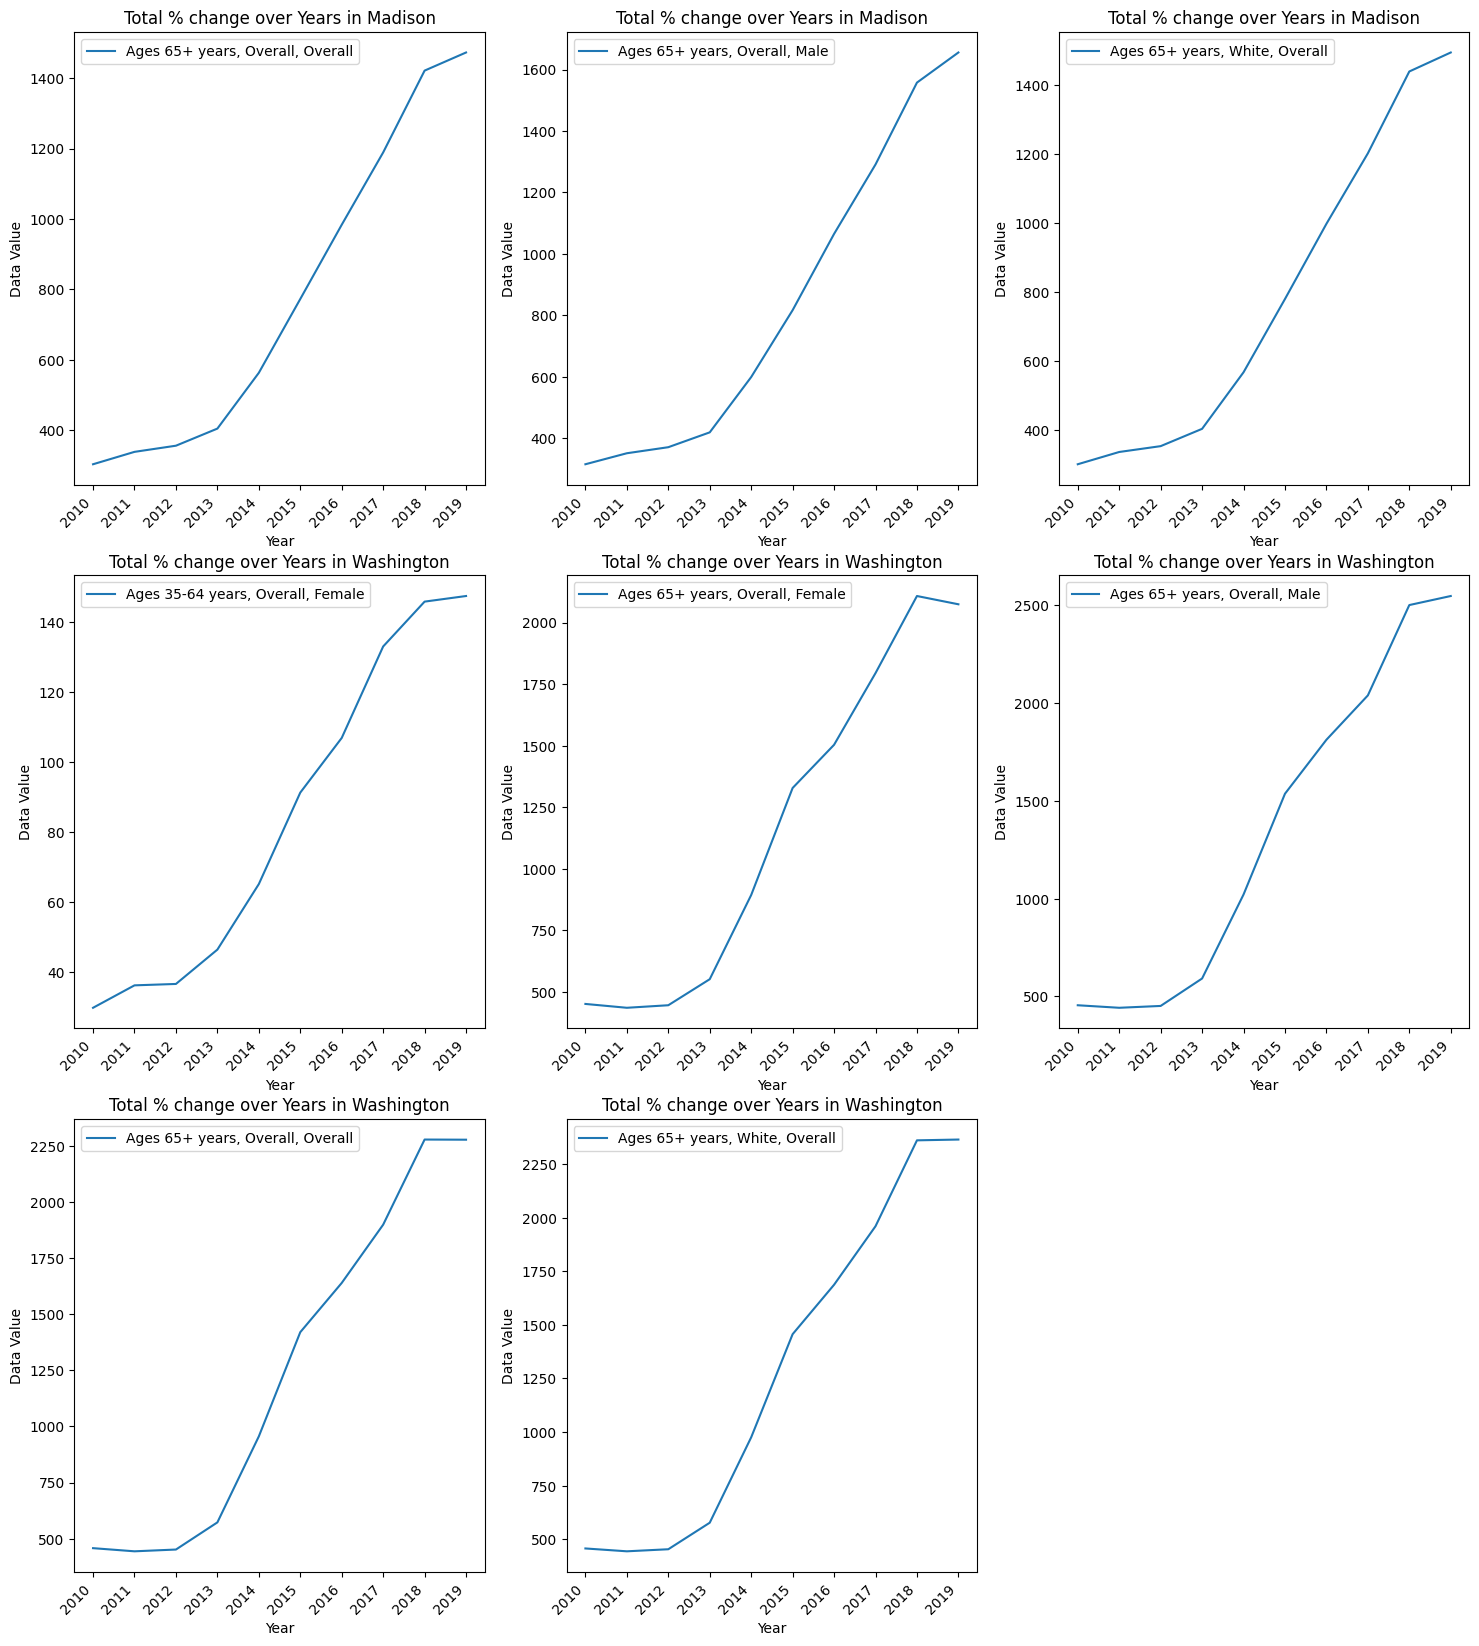

In [ ]:

plt.figure(figsize = (18, 20))
for i in range (outliers_value.shape[0]):
    check = smoothed_rate_df[(smoothed_rate_df['locationid'] == outliers_value['locationid'][i]) &
    (smoothed_rate_df['age_group']==outliers_value['age_group'][i]) & 
    (smoothed_rate_df['race/ethnicityage_group']==outliers_value['race/ethnicityage_group'][i]) &
    (smoothed_rate_df['sex']==outliers_value['sex'][i]) &
    (pd.notna(smoothed_rate_df['data_value'])) & 
    (smoothed_rate_df['year']>='2010')]
    
    note = outliers_value['age_group'][i] +', '+ outliers_value['race/ethnicityage_group'][i] +', '+outliers_value['sex'][i]

    plt.subplot(3,3,i+1)
    plt.plot(check['year'], check['data_value'], label = note)

    plt.xlabel('Year')
    plt.ylabel('Data Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    title = f'Total % change over Years in '+ outliers_value['locationdesc'][i]
    plt.title(title)
plt.show()


Đúng là đã có sự tăng đáng kể trong giai đoạn 2010 - 2019, cho nên các outlier không phải do lỗi nhập liệu. Tạm thời nhóm không loại bỏ các giá trị này, sẽ cân nhắc loại bỏ (hoặc không) trong quá trình xây dựng model.

#### Với mỗi cột không phải dạng số, dữ liệu đang phân bố như thế nào?

Ứng với mỗi cột không phải dạng số, ta xem xét tính các giá trị sau: 
- Tỷ lệ (0-100%) của các giá trị bị thiếu
- Số lượng giá trị khác nhau
- Giá trị xuất hiện nhiều nhất
- Giá trị xuất hiện ít nhất


In [ ]:

none_numeric_columns = [col for col in total_percent_df.columns if col not in numeric_cols]

ob_col_info_df = pd.DataFrame([],index = ['missing ratio','num diff value','Most appear','Min appear'])

for col in none_numeric_columns:
    missing = total_percent_df[col].isna().sum() * 100 / len(total_percent_df)  # Tính phần trăm giá trị thiếu
    diff_value = len(total_percent_df[col].dropna().unique())
    count_value = total_percent_df[col].dropna().value_counts()
    most_ap = count_value.index[0]
    least_ap = count_value.index[-1]
    
    # Thêm thông tin vào DataFrame
    ob_col_info_df[col] = [missing, diff_value, most_ap, least_ap]

ob_col_info_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex
missing ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num diff value,2773,2,50,1645,2,6,3
Most appear,36081,2010-2019,TX,Washington,Ages 35-64 years,Overall,Overall
Min appear,51103,2000-2010,WI,Cowlitz,Ages 65+ years,American Indian and Alaska Native,Female


Ta thấy:
- Không có cột nào bị thiếu dữ liệu.

- Có tổng số 2773 quận được thống kê

- Có 2 khoảng thời gian được thống kê là 2000 - 2010 và 2010 - 2019

- Có 50 ban được thống kê

- Bao gồm 2 nhóm tuổi, 5 nhóm chủng tộc (+1 giá trị Overall), 2 giới tính (Male, Female) +1 Overall

- (Mã) Quận có số lần xuất hiện nhiều nhất là `36081`, ít nhất là `51103`

- Khoảng thời gian được thống kê nhiều hơn là `2010 - 2019`

- Bang xuất hiện nhiều nhất là TX (Texas), ít nhất là WI (Wisconsin)

- Nhóm tuổi từ 35-64 có nhiều số liệu thống kê hơn
 



### 3. Đối với smoothed_rate_df

#### Với mỗi cột dạng số (numeric columns), dữ liệu đang phân bố như thế nào?

Ứng với mỗi cột dạng số, ta xem xét tính các giá trị sau: 
- Tỷ lệ (0-100%) của các giá trị bị thiếu
- Giá trị nhỏ nhất 
- Phân vị 25
- Phân vị 50
- Phân vị 75
- Giá trị lớn nhất
  
Note: 2 cột x_long, y_lat biểu thị cho kinh độ và vĩ độ, nhóm chỉ xem xét tỷ lệ mất dữ liệu, không xem xét các giá trị còn lại.


In [ ]:
num_col_info_smoothed_df = smoothed_rate_df.select_dtypes(include=['float64'])
num_col_info_smoothed_df = num_col_info_smoothed_df.agg([missing_ratio])

num_col_info_smoothed_df = pd.concat([num_col_info_smoothed_df,smoothed_rate_df.describe()])
num_col_info_smoothed_df

,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
missing_ratio,0.000000,0.000000,48.002183,48.002183,48.002183
count,909042.000000,909042.000000,472682.000000,472682.000000,472682.000000
mean,-92.097481,37.855250,222.854467,183.410696,271.374199
std,11.200530,4.967041,229.092643,192.261858,274.726315
min,-124.156295,20.988133,3.100000,2.500000,3.900000
25%,-98.351618,34.088838,30.200000,23.500000,38.900000
50%,-90.969001,38.022839,104.800000,83.400000,132.400000
75%,-84.063804,41.397906,380.700000,313.200000,462.100000
max,-67.629152,48.814842,2857.900000,2374.400000,3414.000000


Kết quả cho thấy các cột ***'data_value', 'confidence_limit_low', 'confidence_limit_high'*** có tỉ lệ thiếu dữ liệu là ~48% (gần 1 nửa tổng thể). Thay vì điền dữ liệu vào các dòng thiếu, nhóm chọn cách loại bỏ các dòng đó để tránh làm sai lệch giá trị dự đoán khi điền giá trị khác vào.

Ngoài ra như đã trình bày ở trên, các cột `confidence_limit_low`, `confidence_limit_high` thể hiện cho khoảng tin cậy của data_value, nên nhóm em tập trung xử lý cho data_value là chính.

In [ ]:
smoothed_rate_df = smoothed_rate_df.dropna(subset=['data_value'])
print(smoothed_rate_df.shape)

(472682, 12)


Kiểm tra lại:

In [ ]:
num_col_info_smoothed_df = smoothed_rate_df.select_dtypes(include=['float64'])
num_col_info_smoothed_df = num_col_info_smoothed_df.agg([missing_ratio])

num_col_info_smoothed_df = pd.concat([num_col_info_smoothed_df,smoothed_rate_df.describe()])
num_col_info_smoothed_df

,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000
count,472682.000000,472682.000000,472682.000000,472682.000000,472682.000000
mean,-91.030080,37.439814,222.854467,183.410696,271.374199
std,11.399266,4.766106,229.092643,192.261858,274.726315
min,-124.156295,23.751495,3.100000,2.500000,3.900000
25%,-96.794694,33.771438,30.200000,23.500000,38.900000
50%,-89.479020,37.545579,104.800000,83.400000,132.400000
75%,-83.250071,40.990033,380.700000,313.200000,462.100000
max,-67.629152,48.814842,2857.900000,2374.400000,3414.000000


### Outlier
Vẽ biểu đồ boxplot để tìm outliers của các cột numeric 

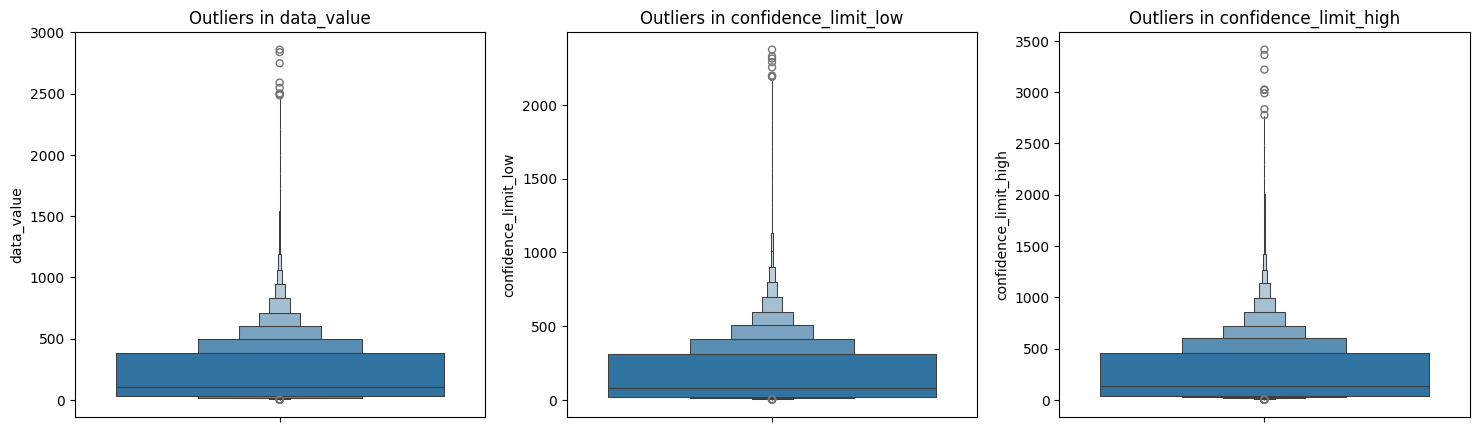

In [ ]:
count = 1
plt.figure(figsize = (18, 5))

for col in ['data_value', 'confidence_limit_low',
       'confidence_limit_high']:
   plt.subplot(1,3,count)
   sns.boxenplot(y=col,data=smoothed_rate_df)
   plt.title('Outliers in {}'.format(col))
   count+=1
plt.show() 

Ta thấy outlier nằm ở các dòng có data_value >2400, ta thử in các dòng này xem:

In [ ]:
outliers_value2 = smoothed_rate_df[smoothed_rate_df['data_value'] > 2400]
outliers_value2.reset_index(inplace=True)
outliers_value2.sort_values(by = 'data_value', ascending=False)

,index,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
7,78701,08014,2000,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,2857.9,2374.4,3361.9
2,78641,08014,2000,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,2837.0,2328.9,3414.0
5,78681,08014,2000,CO,Broomfield,Ages 65+ years,Overall,Overall,-105.054751,39.953329,2746.4,2289.8,3219.5
8,78702,08014,2001,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,2589.4,2198.2,3020.6
1,56599,05143,2019,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,2546.6,2314.4,2776.5
0,56598,05143,2018,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,2500.4,2254.8,2738.8
4,78661,08014,2000,CO,Broomfield,Ages 65+ years,Overall,Male,-105.054751,39.953329,2496.7,2047.5,3026.3
3,78642,08014,2001,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,2484.4,2057.9,2988.7
6,78682,08014,2001,CO,Broomfield,Ages 65+ years,Overall,Overall,-105.054751,39.953329,2440.2,2082.1,2834.5


Nhóm nhận thấy dữ liệu của Quận Broomfield (id `08014`) cao bất thường so với phần còn lại nên đã tìm thêm các thông tin khác để lý giải lý do của sự bất thường này (là lỗi nhập liệu hay số liệu chính xác thật sự cao như vậy).
- Trước hết, xem xét toàn bộ dữ liệu của quận Broomfield bang CO, nhóm tuổi 65+ qua các năm 

In [ ]:
condition_broomfield = ((smoothed_rate_df['locationdesc'] == 'Broomfield') & 
             (smoothed_rate_df['locationid'] == '08014') & 
             (smoothed_rate_df['age_group'] =='Ages 65+ years'))
smoothed_rate_df[condition_broomfield]

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
78641,08014,2000,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,2837.0,2328.9,3414.0
78642,08014,2001,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,2484.4,2057.9,2988.7
78643,08014,2002,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,1999.4,1527.6,2487.1
78644,08014,2003,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,799.3,622.4,993.8
78645,08014,2004,CO,Broomfield,Ages 65+ years,Overall,Female,-105.054751,39.953329,536.7,408.5,673.3
...,...,...,...,...,...,...,...,...,...,...,...,...
78716,08014,2015,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,170.5,129.7,225.7
78717,08014,2016,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,177.1,133.2,231.7
78718,08014,2017,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,207.9,158.3,278.4
78719,08014,2018,CO,Broomfield,Ages 65+ years,White,Overall,-105.054751,39.953329,229.9,171.0,291.9


Nhận thấy trung bình các năm sau 2003 có dao động nhưng không vượt quá 900, nên có vẻ các giá trị >2400 này là có vấn đề.

- Tìm hiểu thêm các thông tin liên quan, Kết quả: quận Broomfield được thành lập vào ngày 15/11/2001, từ một phần của các quận Adams, Boulder, Jefferson và Weld thuộc Bang Colorado, cho nên trong giai đoạn 2000 - 2002, các số liệu thống kê của quận này được ghi nhận bằng tổng số liệu của các thành phần. (Nguồn tham khảo 1 - [CDC Wonder](https://wonder.cdc.gov/wonder/help/ucd.html#:~:text=Broomfield%20county%0ABroomfield,2003%20and%20later), 2 - [Census](https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes/2009/geography-changes.html#:~:text=Broomfield%20County%2C%20Colorado,Broomfield%20County%20(08014)) )

Vậy nên, các giá trị từ năm 2000 - 2002 của quận Broomfield có thể không đảm bảo tính đúng đắn, nhóm em sẽ tiến hành loại bỏ các dữ liệu outlier này.

In [ ]:
condition_broomfield = ((smoothed_rate_df['locationdesc'] == 'Broomfield') & 
             (smoothed_rate_df['locationid'] == '08014') & 
             (smoothed_rate_df['year'].between('2000', '2002')))

# Loại bỏ các dòng dữ liệu thỏa mãn điều kiện và gán trực tiếp vào DataFrame
smoothed_rate_df.drop(smoothed_rate_df[condition_broomfield].index, inplace=True)

Thực hiện tương tự với quận Washington bang AR

In [ ]:
condition_Wash = ((smoothed_rate_df['locationdesc'] == 'Washington') & 
             (smoothed_rate_df['locationabbr'] == 'AR') & 
             (smoothed_rate_df['year']>='2014') & 
             (smoothed_rate_df['age_group'] =='Ages 65+ years')
             ) 
smoothed_rate_df[condition_Wash].sort_values(by = 'year')

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
56574,05143,2014,AR,Washington,Ages 65+ years,Overall,Female,-94.215697,35.979061,893.1,792.5,1026.3
56614,05143,2014,AR,Washington,Ages 65+ years,Overall,Overall,-94.215697,35.979061,955.5,862.9,1076.0
56634,05143,2014,AR,Washington,Ages 65+ years,White,Overall,-94.215697,35.979061,975.3,878.9,1100.3
56594,05143,2014,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,1021.1,892.5,1159.1
56615,05143,2015,AR,Washington,Ages 65+ years,Overall,Overall,-94.215697,35.979061,1419.5,1296.8,1558.7
56595,05143,2015,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,1536.2,1357.5,1715.6
56635,05143,2015,AR,Washington,Ages 65+ years,White,Overall,-94.215697,35.979061,1456.3,1326.8,1603.1
56575,05143,2015,AR,Washington,Ages 65+ years,Overall,Female,-94.215697,35.979061,1327.9,1178.4,1489.3
56596,05143,2016,AR,Washington,Ages 65+ years,Overall,Male,-94.215697,35.979061,1812.0,1613.2,2030.4
56576,05143,2016,AR,Washington,Ages 65+ years,Overall,Female,-94.215697,35.979061,1503.4,1367.5,1675.7


Nhận thấy trung bình 5 năm trước đó, dữ liệu của Washington, AR đã cao và có xu hướng tăng, nên dữ liệu này không phải cao bất thường do nhập liệu.

#### Với mỗi cột không phải dạng số, dữ liệu đang phân bố như thế nào?

Ứng với mỗi cột không phải dạng số, ta xem xét tính các giá trị sau: 
- Tỷ lệ (0-100%) của các giá trị bị thiếu
- Số lượng giá trị khác nhau
- Giá trị xuất hiện nhiều nhất
- Giá trị xuất hiện ít nhất


In [ ]:
none_numeric_columns = [col for col in smoothed_rate_df.columns if col not in numeric_cols]

ob_col_info_df = pd.DataFrame([],index = ['missing ratio','num diff value','Most appear','Min appear'])

for col in none_numeric_columns:
    missing = smoothed_rate_df[col].isna().sum() * 100 / len(smoothed_rate_df)  # Tính phần trăm giá trị thiếu
    diff_value = len(smoothed_rate_df[col].dropna().unique())
    count_value = smoothed_rate_df[col].dropna().value_counts()
    most_ap = count_value.index[0]
    least_ap = count_value.index[-1]
    
    # Thêm thông tin vào DataFrame
    ob_col_info_df[col] = [missing, diff_value, most_ap, least_ap]

ob_col_info_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex
missing ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num diff value,2750,20,47,1635,2,6,3
Most appear,17031,2010,TX,Washington,Ages 35-64 years,Overall,Overall
Min appear,25019,2002,DC,Bethel,Ages 65+ years,American Indian and Alaska Native,Female


Ta thấy:
- Không có cột nào bị thiếu dữ liệu.

- Có tổng số 2750 quận được thống kê

- Dữ liệu thống kê trong 20 năm

- Có 47 ban được thống kê (3 ban có thể đã bị loại bỏ do không có dữ liệu (NaN))

- Bao gồm 2 nhóm tuổi, 5 nhóm chủng tộc (+1 giá trị Overall), 2 giới tính (Male, Female) +1 Overall

- (Mã) Quận có số lần xuất hiện nhiều nhất là `17031`, ít nhất là `25019`

- Năm có nhiều dữ liệu được ghi nhận nhất là `2010`, ít nhất là `2002`

- Bang xuất hiện nhiều nhất là TX (Texas), ít nhất là DC (District of Columbia)

- Nhóm tuổi từ 35-64 có nhiều số liệu thống kê hơn


## 2. About df2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        59094 non-null  object
 1   locationabbr                59094 non-null  object
 2   locationdesc                59094 non-null  object
 3   geographiclevel             59094 non-null  object
 4   datasource                  59094 non-null  object
 5   class                       59094 non-null  object
 6   topic                       59094 non-null  object
 7   data_value                  33087 non-null  object
 8   data_value_unit             59094 non-null  object
 9   data_value_type             59094 non-null  object
 10  stratificationcategory1     59094 non-null  object
 11  stratification1             59094 non-null  object
 12  stratificationcategory2     59094 non-null  object
 13  stratification2             59094 non-null  ob

### Dữ liệu có bao nhiêu dòng, cột?

In [ ]:
shape = df2.shape
print(f"Current shape:{shape}")

Current shape:(59094, 20)


### Dữ liệu có các dòng bị trùng lặp hay không?

In [ ]:
have_duplicated_rows = df2.duplicated().sum()

In [ ]:
# TEST
assert have_duplicated_rows == False

Kết quả sau kiểm tra cho thấy không có dòng nào bị trùng lắp.

### Mỗi cột có ý nghĩa gì?

In [ ]:
columns_name = df2.columns
print("Các cột hiện có:\n",columns_name)

Các cột hiện có:
 Index(['year', 'locationabbr', 'locationdesc', 'geographiclevel', 'datasource',
       'class', 'topic', 'data_value', 'data_value_unit', 'data_value_type',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'topicid', 'locationid', 'y_lat', 'x_lon',
       'data_value_footnote_symbol', 'data_value_footnote'],
      dtype='object')


Mô tả sơ về các cột trong dữ liệu mà nhóm đã lấy về được:  
1. **year** : Năm hoặc giai đoạn của dữ liệu

2. **locationabbr** : Địa điểm (Viết tắt)

3. **locationdesc** : Mô tả về địa điểm

4. **geographilevel** : Cấp độ địa lý

5. **datasource** : Nguồn dữ liệu

6. **class** : Nhóm dữ liệu

7. **topic** : Chủ đề của dữ liệu

8. **data_value** : Giá trị dữ liệu 

9. **data_value_unit** : Đơn vị đo lường

10. **data_value_type** : Loại giá trị 

11. **stratificationcategory1** : Kiểu phân loại 1

12. **stratification1** : Giá trị của kiểu phân loại 1

13. **stratificationcategory2** : Kiểu phân loại 2

14. **stratification2** : Giá trị của kiểu phân loại 2

15. **topicid** : ID của chủ đề

16. **y_lat** : Vĩ độ

17. **x_lon** : Kinh độ 

18. **data_value_footnote_symbol** : Biểu tượng chú thích

19. **data_value_footnote** : Giá trị chú thích

### Từng cột đang có kiểu dữ liệu như thế nào? Có phù hợp để xử lý cho các bước kế tiếp không?

In [ ]:
df2.sample()

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
24465,2019,MN,Rock County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,White,T2,27133,43.673419897,-96.25916374,NaN,NaN


In [ ]:
df2.dtypes

year                          object
locationabbr                  object
locationdesc                  object
geographiclevel               object
datasource                    object
class                         object
topic                         object
data_value                    object
data_value_unit               object
data_value_type               object
stratificationcategory1       object
stratification1               object
stratificationcategory2       object
stratification2               object
topicid                       object
locationid                    object
y_lat                         object
x_lon                         object
data_value_footnote_symbol    object
data_value_footnote           object
dtype: object

Các cột đều đang ở dạng object, điều này là không nên bởi vì nếu cột nào cũng ở dạng object thì rất khó tính toán. Do đó, nhóm sẽ tiến hành chuyển đổi các cột về kiểu dữ liệu phù hợp 

Các cột có thể chuyển đổi sang numeric: x_lon,	y_lat, data_value  

**Đầu tiên, xem xét dữ liệu trong 3 cột có thể chuyển sang numeric: x_long,	y_lat, data_value**

In [ ]:
numeric_cols2 =["x_lon","y_lat", "data_value"]
df2[numeric_cols2]

,x_lon,y_lat,data_value
0,-161.9599296,55.442393334,182.4
1,-166.9175329,53.648343064,172.6
2,-149.1045591,61.159144533,255.6
3,-159.7532618,60.923647647,343.4
4,-156.694662,58.753495988,NaN
...,...,...,...
59089,-107.552,42.9984,NaN
59090,-107.552,42.9984,NaN
59091,-107.552,42.9984,338.4
59092,-107.552,42.9984,432.2


Nhận thấy dữ liệu là các số thực, tiến hành chuyển sang dạng số:

In [ ]:
df2[numeric_cols2]=df2[numeric_cols2].astype(np.float64)
df2.dtypes

year                           object
locationabbr                   object
locationdesc                   object
geographiclevel                object
datasource                     object
class                          object
topic                          object
data_value                    float64
data_value_unit                object
data_value_type                object
stratificationcategory1        object
stratification1                object
stratificationcategory2        object
stratification2                object
topicid                        object
locationid                     object
y_lat                         float64
x_lon                         float64
data_value_footnote_symbol     object
data_value_footnote            object
dtype: object

### Kiểm tra sơ lược về giá trị của từng cột

In [ ]:
# Đếm số dữ liệu duy nhất của từng cột
unique_counts2 = df2.nunique()
# Hiển thị kết quả
print("Số dữ liệu duy nhất của từng cột:")
print(unique_counts2)


Số dữ liệu duy nhất của từng cột:
year                             1
locationabbr                    57
locationdesc                  2022
geographiclevel                  3
datasource                       1
class                            1
topic                            1
data_value                    6399
data_value_unit                  1
data_value_type                  2
stratificationcategory1          1
stratification1                  3
stratificationcategory2          1
stratification2                  6
topicid                          1
locationid                    3283
y_lat                         3282
x_lon                         3282
data_value_footnote_symbol       1
data_value_footnote              1
dtype: int64


### Xoá các cột không có ý nghĩa

In [ ]:
# Tách lấy các cột chỉ mang 1 giá trị 
one_value_cols2 = [col for col in df2.columns if unique_counts2[col] == 1]
print("Các cột chỉ có 1 giá trị, và giá trị tương ứng của cột đó:")
for col in one_value_cols2:
    print("{:<28} : {:>2}".format(col, df2[col][0]))

Các cột chỉ có 1 giá trị, và giá trị tương ứng của cột đó:
year                         : 2019
datasource                   : NVSS
class                        : Cardiovascular Diseases
topic                        : Heart Disease Mortality
data_value_unit              : per 100,000 population
stratificationcategory1      : Gender
stratificationcategory2      : Race/Ethnicity
topicid                      : T2
data_value_footnote_symbol   : nan
data_value_footnote          : nan


Ta thấy, các cột vừa liệt kê chỉ mang duy nhất 1 giá trị cho toàn bộ dữ liệu. 
Điều đó nói lên điểm chung của bộ dữ liệu này là: 
- Đều vào năm 2019
- Nguồn dữ liệu từ NVSS (National Vital Statistics System)
- Lớp Bệnh tim mạch (Cardiovascular Diseases)
- Chủ đề: Bệnh tim mạch nặng
- Đơn vị giá trị dữ liệu: trên 100,000 người
- Danh mục phân loại 1: Giới tính
- Danh mục phân loại 2: Chủng tộc/ Dân tộc
- Mã chủ đề: Cùng là `T2` 
- Biểu tượng chú thích giá trị dữ liệu & Chú thích giá trị dữ liệu đều là nan
 
Tuy nhiên, chúng không đóng góp/ ảnh hưởng gì vào quá trình tính toán về sau, ta sẽ loại bỏ chúng.  
Ngoài ra, trước khi loại bỏ, nhóm chúng em xem xét thấy các cột `stratificationcategory*` là tên loại của các cột `stratification*`, cho nên chúng em sẽ tiến hành đổi tên như sau: 

In [ ]:
# Đổi tên
column_names = {'stratification1': 'sex', 'stratification2': 'race/ethnicityage_group'}
df2 = df2.rename(columns=column_names)
df2.reset_index(drop=True, inplace=True)

#### Xoá các cột không cần dùng

In [ ]:
df2 = df2.drop(columns=['year', 'geographiclevel', 'datasource', 'class', 'topic', 'data_value_footnote_symbol', 'data_value_footnote', 'stratificationcategory1', 'stratificationcategory2','topicid', 'data_value_type', 'data_value_unit'])
df2.head(5)

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
0,AK,Aleutians East,182.4,Overall,Overall,02013,55.442393,-161.959930
1,AK,Aleutians West,172.6,Overall,Overall,02016,53.648343,-166.917533
2,AK,Anchorage,255.6,Overall,Overall,02020,61.159145,-149.104559
3,AK,Bethel,343.4,Overall,Overall,02050,60.923648,-159.753262
4,AK,Bristol Bay,NaN,Overall,Overall,02060,58.753496,-156.694662


### Handle missing data

##### Với mỗi cột dạng số (numeric columns), dữ liệu đang phân bố như thế nào?

Ứng với mỗi cột dạng số, ta xem xét tính các giá trị sau: 
- Tỷ lệ (0-100%) của các giá trị bị thiếu
- Giá trị nhỏ nhất 
- Phân vị 25
- Phân vị 50
- Phân vị 75
- Giá trị lớn nhất
  
Note: 2 cột x_long, y_lat biểu thị cho kinh độ và vĩ độ, nhóm chỉ xem xét tỷ lệ mất dữ liệu, không xem xét các giá trị còn lại.


In [ ]:
num_col_info_df2 = df2.select_dtypes(include=['float64'])
num_col_info_df2 = num_col_info_df2.agg([missing_ratio])

num_col_info_df2 = pd.concat([num_col_info_df2,df2.describe()])
num_col_info_df2

,data_value,y_lat,x_lon
missing_ratio,44.009544,0.030460,0.030460
count,33087.000000,59076.000000,59076.000000
mean,344.060571,37.901745,-91.406452
std,148.004264,6.326395,15.942302
min,0.000000,-14.301754,-170.719474
25%,241.800000,34.326243,-98.129615
50%,329.100000,38.220930,-89.931055
75%,428.900000,41.695739,-82.890640
max,2312.100000,69.309529,145.751259


Kết quả cho thấy các cột ***'data_value', 'confidence_limit_low', 'confidence_limit_high'*** không có sự thiếu/ mất mát dữ liệu.

# III. Lưu trữ dữ liệu

In [ ]:
total_percent_df.to_csv('Data/total_percent_df.csv', index=False)
smoothed_rate_df.to_csv('Data/smoothed_rate_df.csv', index=False)
df2.to_csv('Data/2019_df.csv', index=False)